In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
# pip install pandas_datareader

In [3]:
start=dt(2021, 1, 1)

In [4]:
end=dt(2021, 12, 1)

In [5]:
df=pdr.DataReader(name='AAPL', data_source='yahoo', start=start, end=end)

In [6]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.333527
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.087067
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.670715
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.305786
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.581635


In [7]:
data = df
X = data[['High','Low','Open','Volume']].values
y = data['Close'].values

In [8]:
# split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [9]:
regressor = LinearRegression()

In [10]:
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
print(regressor.coef_)

[ 9.41276339e-01  5.71930752e-01 -5.12109673e-01 -4.72946693e-09]


In [12]:
print(regressor.intercept_)

-0.13254693262521755


In [13]:
predicted = regressor.predict(X_test)

In [14]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [15]:
R2_score = r2_score(y_test,predicted)

In [16]:
print("training score = ",regressor.score(X_train, y_train))
print("Testing score = ",regressor.score(X_test, y_test))
print("Mean Absolute error =",mean_absolute_error(y_test,predicted))
print("Mean Squared error =",mean_squared_error(y_test,predicted))
print("Root Mean Squared error=",np.sqrt(mean_squared_error(y_test,predicted)))
print("R2score = " ,R2_score)

training score =  0.994460002762269
Testing score =  0.9922246869854482
Mean Absolute error = 0.7562699390064785
Mean Squared error = 1.1286845579715972
Root Mean Squared error= 1.0623956692172636
R2score =  0.9922246869854482


In [17]:
df4=pd.DataFrame(predicted, columns=['pred'])

In [18]:
df4['test']=pd.DataFrame(y_test)

In [19]:
df4.head()

,pred,test
0,164.564342,161.020004
1,127.638276,126.849998
2,155.008436,155.110001
3,134.825825,134.839996
4,127.173787,126.110001


<AxesSubplot:>

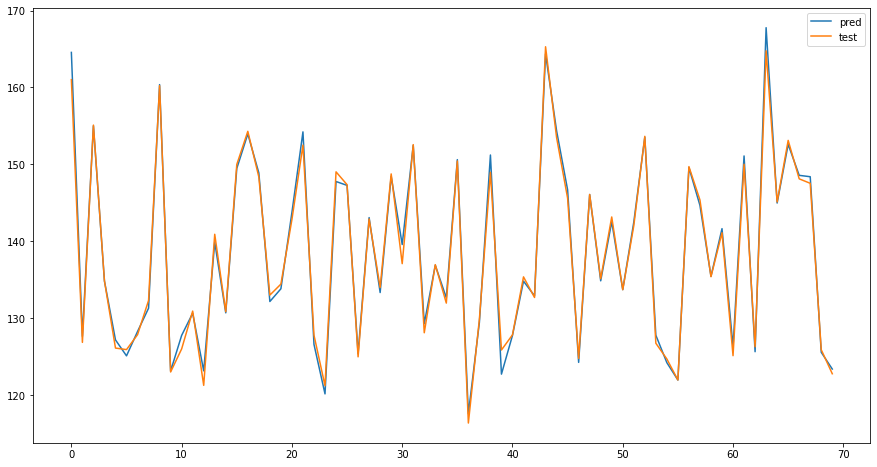

In [22]:
df4.plot(figsize=(15,8))